In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns

#Set the font
from matplotlib import font_manager
font_dirs = ['/home/user/gzhao/Thesis/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
   font_manager.fontManager.addfont(font_file)
   
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

/home/user/gzhao/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


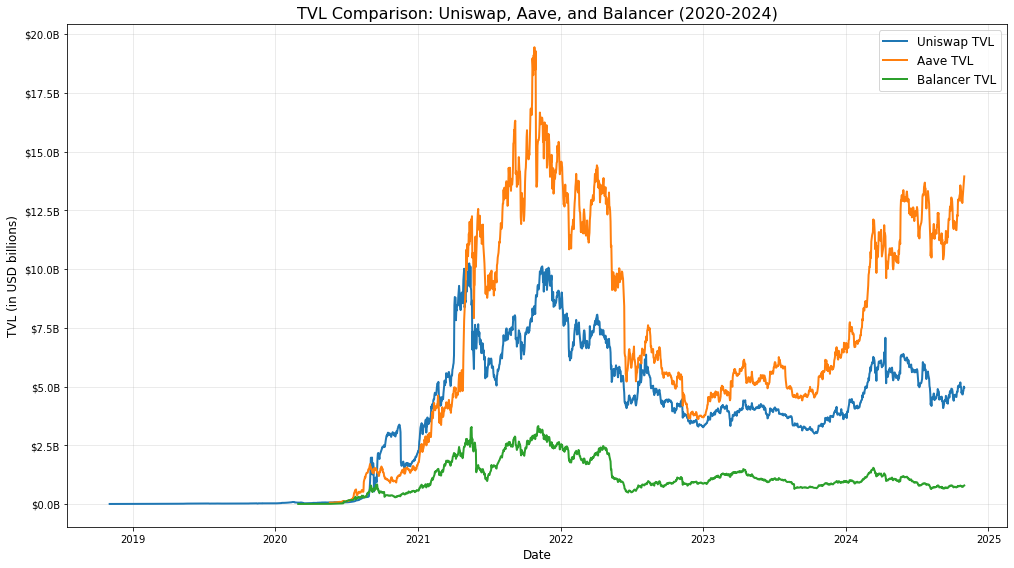

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Function to fetch TVL data from DefiLlama for a given protocol
def fetch_tvl_data(protocol_name):
    url = f"https://api.llama.fi/protocol/{protocol_name}"
    response = requests.get(url)
    data = response.json()
    tvl_data = [
        {
            "date": datetime.utcfromtimestamp(point["date"]),
            "tvl": point["totalLiquidityUSD"]
        }
        for point in data["tvl"]
        if datetime.utcfromtimestamp(point["date"]) <= datetime(2024, 10, 31)
    ]
    return pd.DataFrame(tvl_data)

# Fetch TVL data for Uniswap, Aave, and Balancer
uniswap_data = fetch_tvl_data("uniswap")
aave_data = fetch_tvl_data("aave")
balancer_data = fetch_tvl_data("balancer")

# Merge data into a single DataFrame for plotting
combined_data = pd.merge(uniswap_data, aave_data, on="date", how="outer", suffixes=("_uniswap", "_aave"))
combined_data = pd.merge(combined_data, balancer_data, on="date", how="outer")
combined_data.rename(columns={"tvl": "tvl_balancer"}, inplace=True)
combined_data.sort_values("date", inplace=True)

# Plotting TVL data for Uniswap, Aave, and Balancer
plt.figure(figsize=(14, 8))
plt.plot(combined_data['date'], combined_data['tvl_uniswap'], label='Uniswap TVL', linewidth=2)
plt.plot(combined_data['date'], combined_data['tvl_aave'], label='Aave TVL', linewidth=2)
plt.plot(combined_data['date'], combined_data['tvl_balancer'], label='Balancer TVL', linewidth=2)

# Customizing the chart
plt.title('TVL Comparison: Uniswap, Aave, and Balancer (2020-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('TVL (in USD billions)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

# Formatting the y-axis to show billions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e9:.1f}B'))

# Show the chart
plt.show()


In [145]:
import pandas as pd

# Load the token price data
token_price = pd.read_csv('/home/user/gzhao/Thesis/Price/token_price.csv')

# Filter for priceUSD > 7000
token_price = token_price[token_price['priceUSD'] > 7000]

# Get unique token names
unique_tokens = token_price['token.name'].unique()

# Calculate the highest price, lowest price, count of occurrences above 7000,
# and the difference between highest and lowest price for each token
summary = token_price.groupby('token.name').agg(
    highest_price=('priceUSD', 'max'),
    lowest_price=('priceUSD', 'min'),
    count_above_7000=('priceUSD', lambda x: (x > 7000).sum())
).reset_index()

# Calculate the difference between highest and lowest price
summary['price_difference'] = summary['highest_price'] - summary['lowest_price']

pd.options.display.float_format = '{:.2f}'.format  # Adjust to two decimal places

# Display unique tokens
print("Unique tokens:", unique_tokens)

# Display the summary DataFrame
print("\nSummary of highest prices, counts, and price differences:")
print(summary)

# Reset display option
pd.reset_option('display.float_format')


Unique tokens: ['BoringDAO BTC' 'UPeth' 'WrappedStar' 'unification.com/xfund'
 'FRMx Token' 'Decentralized Business Systems' 'Opyn Squeeth'
 'Elastic Bitcoin' 'All I want is Unity' 'Three Hundred' 'ETH3L'
 'Wrapped Origin Axie' 'Vibe' 'Uniswap V2' 'Bloc' 'HayCoin' 'tBTC'
 'Bounce Token' 'LadyPepe' 'Boa' 'CARBON' 'OnChain Pepe 404' 'Wrapped ZEC'
 'Ryoshi Afterparty' 'OPES Finance' 'Spock Token' 'Punk'
 '四皇 - Four Emperors' 'Matrix Samurai Token' 'Spectrum' 'Ethereum Vault'
 'CRPT' 'bAlpha' 'airmoon.finance' 'Synth sBTC' 'cVault.finance'
 'PaleBlueDot' 'Yo Token' 'ARC Governance Token' 'Seed Of The Universe'
 'SHAKE token by SpaceSwap v2' 'NiceCash DeFi-NFT Index'
 'Coinbase Wrapped Staked ETH' 'NAMASTE' 'ROOT' 'PieDAO BTC++' 'APIX'
 'BSG' 'Chain' 'Balancer Pool Token' 'ShibaDoge' 'NiceToken' 'Huobi BTC'
 'EarthFund' 'PRIVEX' 'Ethereum2Proof-of-stake' 'Strudel BTC'
 'YFII.finance' 'BASIC Token' 'Wrapped BTC' 'Gro Vault Token'
 'Binance Wrapped BTC' 'Unisocks Edition 0' 'The Tokenized Bit

In [147]:
import requests

def get_coin_history(symbol, start_date, end_date, samples):
    url = f'https://coincodex.com/api/coincodex/get_coin_history/{symbol}/{start_date}/{end_date}/{samples}'
    response = requests.get(url)
    return response.json()

# Example usage
history = get_coin_history('BTC', '2015-01-24', '2024-01-24', 1000000)
history

{'BTC': [[1422057600, 232.879, 24621700, 3204238878.6492],
  [1422489600, 229.0776446376811, 31739021.68115942, 3150123152.234541],
  [1423008000, 223.6102002321533, 24283565.40917005, 3089736161.078759],
  [1423526400, 231.12653886310923, 31068400.754060324, 3197544805.2589617],
  [1424044800, 239.7887753917585, 27023977.713290773, 3320790669.9282603],
  [1424563200, 239.91939227166256, 17368296.487119436, 3328938885.485804],
  [1425081600, 264.94937371290087, 33308428.22531799, 3680088380.4128222],
  [1425600000, 281.89821557234194, 39202185.24113888, 3922610759.996233],
  [1426118400, 289.0289397101447, 24222460.4057971, 4022938991.8142],
  [1426636800, 263.7756500290196, 30965754.67208357, 3679830792.5916295],
  [1427155200, 249.5125977881256, 26439544.23748545, 3492934530.521528],
  [1427673600, 248.6982766343824, 22540873.97094431, 3483131856.91692],
  [1428192000, 249.72329849012772, 21372473.37398374, 3502053560.023743],
  [1428710400, 229.12403988269787, 23757113.02052786, 321

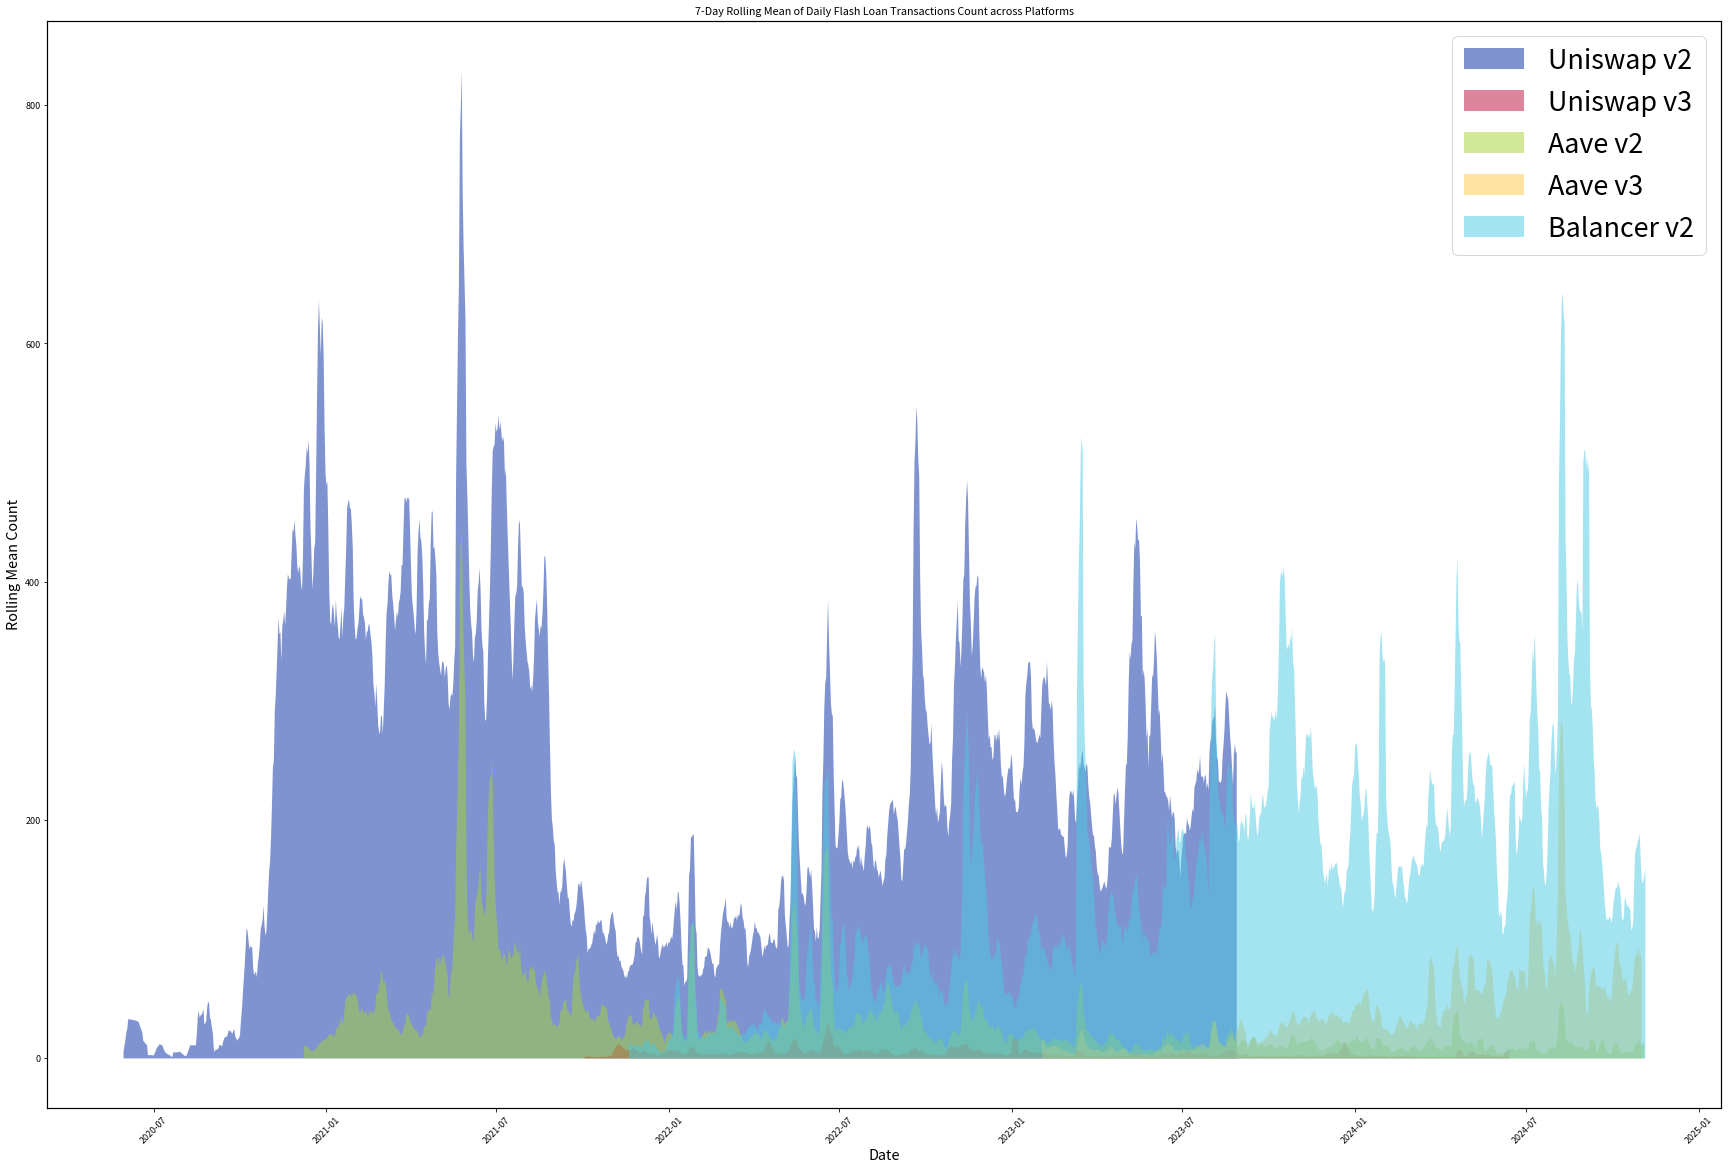

Uniswap v2:
  - Average daily flashloan count: 232.01
  - Highest daily flashloan count: 1291
Uniswap v3:
  - Average daily flashloan count: 4.93
  - Highest daily flashloan count: 84
Aave v2:
  - Average daily flashloan count: 32.15
  - Highest daily flashloan count: 954
Aave v3:
  - Average daily flashloan count: 40.80
  - Highest daily flashloan count: 738
Balancer v2:
  - Average daily flashloan count: 149.74
  - Highest daily flashloan count: 1650


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
Uniswap_v2_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_flashloan_count.csv')
Uniswap_v3_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v3_flashloan_count.csv')
Aave_v2_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_flashloan_count.csv')
Aave_v3_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v3_flashloan_count.csv')
Balancer_v2_flashloan_count_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_flashloan_count.csv')

# Convert 'date' column to datetime
for df in [Uniswap_v2_flashloan_count_df, Uniswap_v3_flashloan_count_df,
            Aave_v2_flashloan_count_df, Aave_v3_flashloan_count_df,
            Balancer_v2_flashloan_count_df]:
    df['date'] = pd.to_datetime(df['date'])

# Create a new figure for the area plot
fig, ax = plt.subplots(figsize=(30, 20))

# Calculate rolling mean (7-day rolling mean as an example)
rolling_window = 7
for platform_df, label in zip(
        [Uniswap_v2_flashloan_count_df, Uniswap_v3_flashloan_count_df, 
         Aave_v2_flashloan_count_df, Aave_v3_flashloan_count_df, 
         Balancer_v2_flashloan_count_df],
        ['Uniswap v2', 'Uniswap v3', 'Aave v2', 'Aave v3', 'Balancer v2']):
    
    # Calculate rolling mean
    platform_df['rolling_mean'] = platform_df['daily_flash_tx_count'].rolling(window=rolling_window).mean()

    # Create area plot for rolling mean
    ax.fill_between(platform_df['date'], platform_df['rolling_mean'], label=label, alpha=0.5)

# Customize the plot
ax.set_title('7-Day Rolling Mean of Daily Flash Loan Transactions Count across Platforms')
ax.set_xlabel('Date')
ax.set_ylabel('Rolling Mean Count')
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper right', fontsize=30)

# Save the figure
fig.savefig('/home/user/gzhao/Thesis/result/daily_flashloan_rolling_mean_area_plot.pdf', facecolor='white', transparent=False)

plt.show()

# Calculate average daily flashloan and highest flashloan count for each platform
platforms = {
    "Uniswap v2": Uniswap_v2_flashloan_count_df,
    "Uniswap v3": Uniswap_v3_flashloan_count_df,
    "Aave v2": Aave_v2_flashloan_count_df,
    "Aave v3": Aave_v3_flashloan_count_df,
    "Balancer v2": Balancer_v2_flashloan_count_df
}

for platform, df in platforms.items():
    avg_flashloan = df['daily_flash_tx_count'].mean()
    max_flashloan = df['daily_flash_tx_count'].max()
    print(f"{platform}:")
    print(f"  - Average daily flashloan count: {avg_flashloan:.2f}")
    print(f"  - Highest daily flashloan count: {max_flashloan}")


/tmp/ipykernel_2733843/2665592597.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Uniswap_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_ABC.csv')
/tmp/ipykernel_2733843/2665592597.py:3: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Aave_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_ABC.csv')
/tmp/ipykernel_2733843/2665592597.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Balancer_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_ABC.csv')


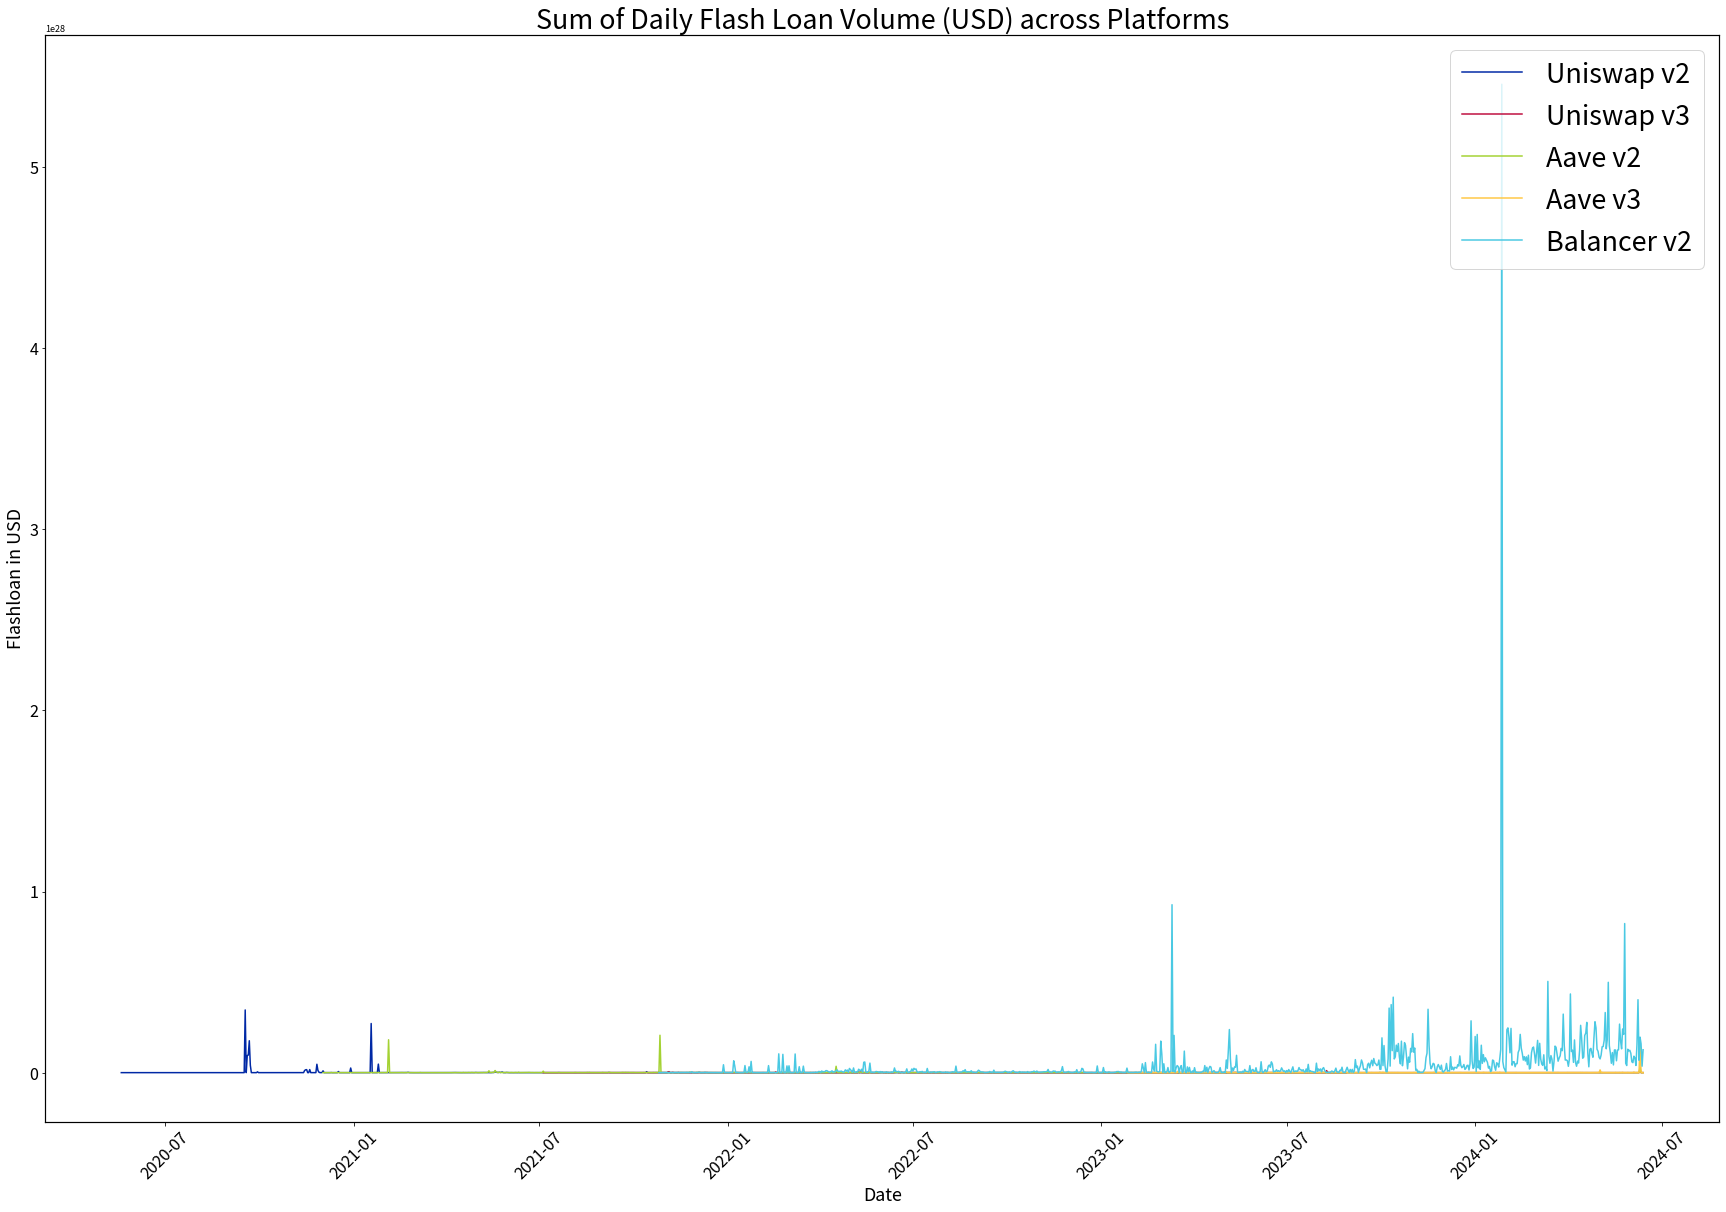

Uniswap v2:
  - Average daily flashloan amount (USD): 11690753109306632816295936.00
  - Highest daily flashloan amount (USD): 3461697409470611441311547392.00
Uniswap v3:
  - Average daily flashloan amount (USD): 1420800753548374916988928.00
  - Highest daily flashloan amount (USD): 177849902957442341265211392.00
Aave v2:
  - Average daily flashloan amount (USD): 5626647501706220156223488.00
  - Highest daily flashloan amount (USD): 2065447244133869341900800000.00
Aave v3:
  - Average daily flashloan amount (USD): 5541419603570449144872960.00
  - Highest daily flashloan amount (USD): 1615454250055327197637378048.00
Balancer v2:
  - Average daily flashloan amount (USD): 417221165088017283068985344.00
  - Highest daily flashloan amount (USD): 54576245998641681308984541184.00


In [5]:
Uniswap_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_ABC.csv')
Uniswap_v3_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v3_ABC.csv')
Aave_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_ABC.csv')
Aave_v3_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v3_ABC.csv')
Balancer_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_ABC.csv')

Uniswap_v2_df['flashloan_in_usd'] = pd.to_numeric(Uniswap_v2_df['flashloan_in_usd'], errors='coerce')
Uniswap_v3_df['flashloan_in_usd'] = pd.to_numeric(Uniswap_v3_df['flashloan_in_usd'], errors='coerce')
Aave_v2_df['flashloan_in_usd'] = pd.to_numeric(Aave_v2_df['flashloan_in_usd'], errors='coerce')
Aave_v3_df['flashloan_in_usd'] = pd.to_numeric(Aave_v3_df['flashloan_in_usd'], errors='coerce')
Balancer_v2_df['flashloan_in_usd'] = pd.to_numeric(Balancer_v2_df['flashloan_in_usd'], errors='coerce')

Uniswap_v2_df['date'] = pd.to_datetime(Uniswap_v2_df['date'])
Uniswap_v3_df['date'] = pd.to_datetime(Uniswap_v3_df['date'])
Aave_v2_df['date'] = pd.to_datetime(Aave_v2_df['date'])
Aave_v3_df['date'] = pd.to_datetime(Aave_v3_df['date'])
Balancer_v2_df['date'] = pd.to_datetime(Balancer_v2_df['date'])

Uniswap_v2_daily_volume = Uniswap_v2_df.groupby('date')['flashloan_in_usd'].sum()
Uniswap_v3_daily_volume = Uniswap_v3_df.groupby('date')['flashloan_in_usd'].sum()
Aave_v2_daily_volume = Aave_v2_df.groupby('date')['flashloan_in_usd'].sum()
Aave_v3_daily_volume = Aave_v3_df.groupby('date')['flashloan_in_usd'].sum()
Balancer_v2_daily_volume = Balancer_v2_df.groupby('date')['flashloan_in_usd'].sum()

# Plot the sum of daily flashloan in USD for each platform
fig, ax = plt.subplots(figsize=(30, 20))

ax.plot(Uniswap_v2_daily_volume.index, Uniswap_v2_daily_volume, label='Uniswap v2')
ax.plot(Uniswap_v3_daily_volume.index, Uniswap_v3_daily_volume, label='Uniswap v3')
ax.plot(Aave_v2_daily_volume.index, Aave_v2_daily_volume, label='Aave v2')
ax.plot(Aave_v3_daily_volume.index, Aave_v3_daily_volume, label='Aave v3')
ax.plot(Balancer_v2_daily_volume.index, Balancer_v2_daily_volume, label='Balancer v2')

ax.set_title('Sum of Daily Flash Loan Volume (USD) across Platforms', fontsize=30)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Flashloan in USD', fontsize=20)
ax.tick_params(axis='x', rotation=45, labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper right', fontsize=30)

# Save the plot
fig.savefig('/home/user/gzhao/Thesis/result/daily_flashloan_volume_comparison.pdf')

plt.show()

platforms = {
    "Uniswap v2": Uniswap_v2_daily_volume,
    "Uniswap v3": Uniswap_v3_daily_volume,
    "Aave v2": Aave_v2_daily_volume,
    "Aave v3": Aave_v3_daily_volume,
    "Balancer v2": Balancer_v2_daily_volume
}

for platform, daily_sum in platforms.items():
    avg_flashloan = daily_sum.mean()
    max_flashloan = daily_sum.max()
    print(f"{platform}:")
    print(f"  - Average daily flashloan amount (USD): {avg_flashloan:.2f}")
    print(f"  - Highest daily flashloan amount (USD): {max_flashloan:.2f}")

/tmp/ipykernel_656437/4021080937.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Uniswap_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_ABC.csv')
/tmp/ipykernel_656437/4021080937.py:4: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Aave_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_ABC.csv')
/tmp/ipykernel_656437/4021080937.py:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Balancer_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_ABC.csv')


Frequency (Highest to Lowest) with Original Ranges:
Frequency: 1066, Range: (9939.007247023079, 10047.008097953229)
Frequency: 880, Range: (99336.92222271975, 100416.35318218918)
Frequency: 825, Range: (100.57762283081615, 101.67053569226049)
Frequency: 817, Range: (99.49645829463303, 100.57762283081615)
Frequency: 815, Range: (102.77532454051985, 103.89211842436723)
Frequency: 815, Range: (128.9607358701624, 130.3620699133313)
Frequency: 810, Range: (119.56423441876439, 120.8634626753789)
Frequency: 808, Range: (154.97126147683372, 156.65523530774425)
Frequency: 805, Range: (117.00752614684903, 118.27897228578576)
Frequency: 804, Range: (97.36887039859707, 98.4269157944595)
Frequency: 804, Range: (120.8634626753789, 122.17680881658582)
Frequency: 804, Range: (133.21058567524153, 134.65810012494958)
Frequency: 803, Range: (114.50548938451655, 115.74974748618921)
Frequency: 789, Range: (86.45476532511417, 87.39421410405217)
Frequency: 784, Range: (113.27460650185813, 114.50548938451655)

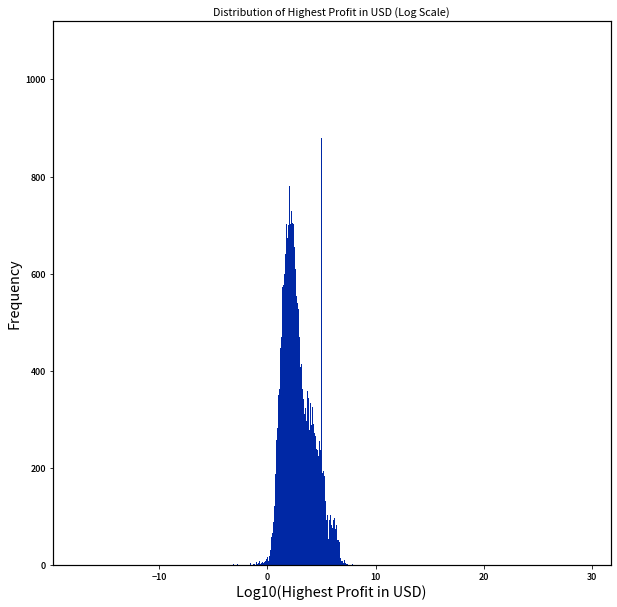

In [129]:
# Load the data
Uniswap_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v2_ABC.csv')
Uniswap_v3_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Uniswap_v3_ABC.csv')
Aave_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v2_ABC.csv')
Aave_v3_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Aave_v3_ABC.csv')
Balancer_v2_df = pd.read_csv('/local/scratch/exported/MP_Defi_txs_TY_23/guanda/Balancer_v2_ABC.csv')

# Merge dataframes
merged_flashloan_df = pd.concat([Uniswap_v2_df, Uniswap_v3_df, Aave_v2_df, Aave_v3_df, Balancer_v2_df], ignore_index=True)

# Filter the 'highest_profit_in_usd' column for values greater than 0
filtered_data = merged_flashloan_df['highest_profit_in_usd']
filtered_data = filtered_data[filtered_data > 0]

# Create the histogram on a log scale and get counts and bin edges
counts, bin_edges = np.histogram(np.log10(filtered_data), bins=10000)

# Create a list of tuples containing frequency and original bin range
frequency_ranges = []
for i in range(len(counts)):
    if counts[i] > 0:  # Only consider bins with non-zero frequency
        original_range = (10 ** bin_edges[i], 10 ** bin_edges[i + 1])
        frequency_ranges.append((counts[i], original_range))

# Sort the list by frequency in descending order
sorted_frequency_ranges = sorted(frequency_ranges, key=lambda x: x[0], reverse=True)

# Print the sorted frequencies with their respective ranges
print("Frequency (Highest to Lowest) with Original Ranges:")
for frequency, original_range in sorted_frequency_ranges:
    print(f'Frequency: {frequency}, Range: {original_range}')

# Create the histogram plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(np.log10(filtered_data), bins=10000)

ax.set_title('Distribution of Highest Profit in USD (Log Scale)')
ax.set_xlabel('Log10(Highest Profit in USD)')
ax.set_ylabel('Frequency')

# Save the figure
fig.savefig('/home/user/gzhao/Thesis/result/Distribution_of_Highest_Profit_in_USD_Log_Scale.pdf')

plt.show()


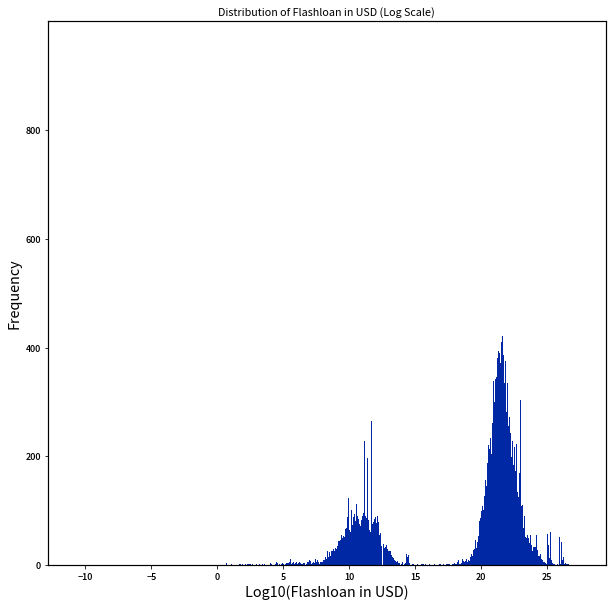

In [5]:
merged_flashloan_df['flashloan_in_usd'] = pd.to_numeric(merged_flashloan_df['flashloan_in_usd'], errors='coerce')
filtered_data = merged_flashloan_df['flashloan_in_usd'].dropna()
filtered_data = filtered_data[filtered_data > 0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(np.log10(filtered_data), bins=10000)

ax.set_title('Distribution of Flashloan in USD (Log Scale)')
ax.set_xlabel('Log10(Flashloan in USD)')
ax.set_ylabel('Frequency')

fig.savefig('/home/user/gzhao/Thesis/result/Distribution_of_Flash_Loan_in_USD_Log_Scale.pdf')

plt.show()

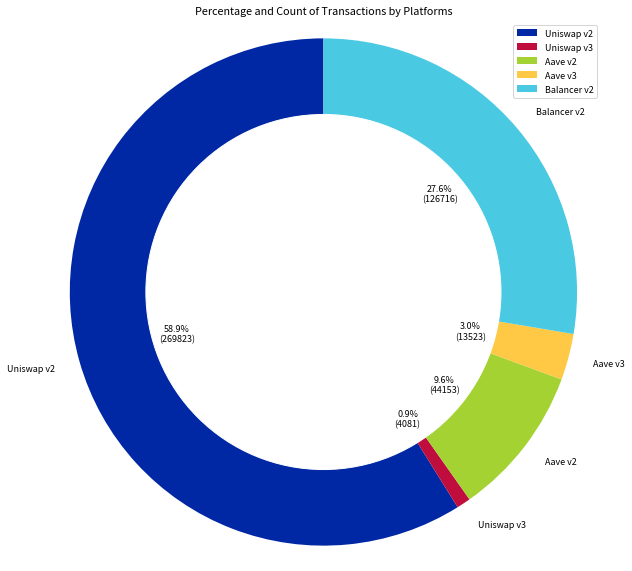

In [9]:
counts = [
    len(Uniswap_v2_df),
    len(Uniswap_v3_df),
    len(Aave_v2_df),
    len(Aave_v3_df),
    len(Balancer_v2_df)
]
labels = ['Uniswap v2', 'Uniswap v3', 'Aave v2', 'Aave v3', 'Balancer v2']

# Function to display both the count and percentage
def autopct_format(pct, all_values):
    total = sum(all_values)
    absolute = int(pct/100.*total)
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(counts, labels=labels, autopct=lambda pct: autopct_format(pct, counts), startangle=90, wedgeprops={'width': 0.4})

center_circle = plt.Circle((0, 0), 0.70, color='white')
ax.add_artist(center_circle)

ax.axis('equal')
ax.legend()
ax.set_title('Percentage and Count of Transactions by Platforms')

fig.savefig('/home/user/gzhao/Thesis/result/Donut_chart_Transaction_Count_and_Percentage.pdf', facecolor='white', transparent=False)

plt.show()

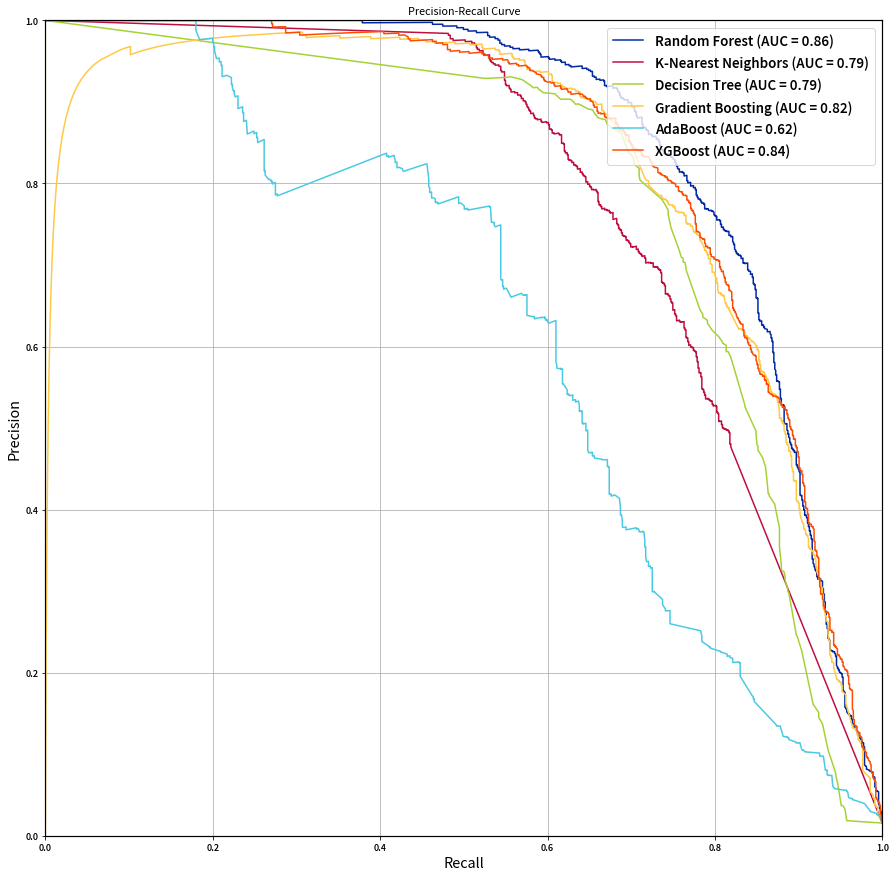

In [2]:
from sklearn.metrics import auc

# Load Precision-Recall data
rf_pr_df = pd.read_csv('Models/random_forest_precision_recall_data.csv')
knn_pr_df = pd.read_csv('Models/knn_precision_recall_data.csv')
dt_pr_df = pd.read_csv('Models/decision_tree_precision_recall_data.csv')
gb_pr_df = pd.read_csv('Models/gradient_boosting_precision_recall_data.csv')
ada_pr_df = pd.read_csv('Models/adaboost_precision_recall_data.csv')
xg_pr_df = pd.read_csv('Models/xgboost_precision_recall_data.csv')

# Calculate AUC for Precision-Recall curves
rf_pr_auc = auc(rf_pr_df['Recall'], rf_pr_df['Precision'])
knn_pr_auc = auc(knn_pr_df['Recall'], knn_pr_df['Precision'])
dt_pr_auc = auc(dt_pr_df['Recall'], dt_pr_df['Precision'])
gb_pr_auc = auc(gb_pr_df['Recall'], gb_pr_df['Precision'])
ada_pr_auc = auc(ada_pr_df['Recall'], ada_pr_df['Precision'])
xg_pr_auc = auc(xg_pr_df['Recall'], xg_pr_df['Precision'])

# Plot Precision-Recall curves with AUC in the legend
fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(rf_pr_df['Recall'], rf_pr_df['Precision'], label=f'Random Forest (AUC = {rf_pr_auc:.2f})')
ax.plot(knn_pr_df['Recall'], knn_pr_df['Precision'], label=f'K-Nearest Neighbors (AUC = {knn_pr_auc:.2f})')
ax.plot(dt_pr_df['Recall'], dt_pr_df['Precision'], label=f'Decision Tree (AUC = {dt_pr_auc:.2f})')
ax.plot(gb_pr_df['Recall'], gb_pr_df['Precision'], label=f'Gradient Boosting (AUC = {gb_pr_auc:.2f})')
ax.plot(ada_pr_df['Recall'], ada_pr_df['Precision'], label=f'AdaBoost (AUC = {ada_pr_auc:.2f})')
ax.plot(xg_pr_df['Recall'], xg_pr_df['Precision'], label=f'XGBoost (AUC = {xg_pr_auc:.2f})')

# Add labels and title
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='upper right', fontsize=15)
ax.grid()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Save and show the plot
fig.savefig('/home/user/gzhao/Thesis/result/precision_recall_curve.pdf')
plt.show()


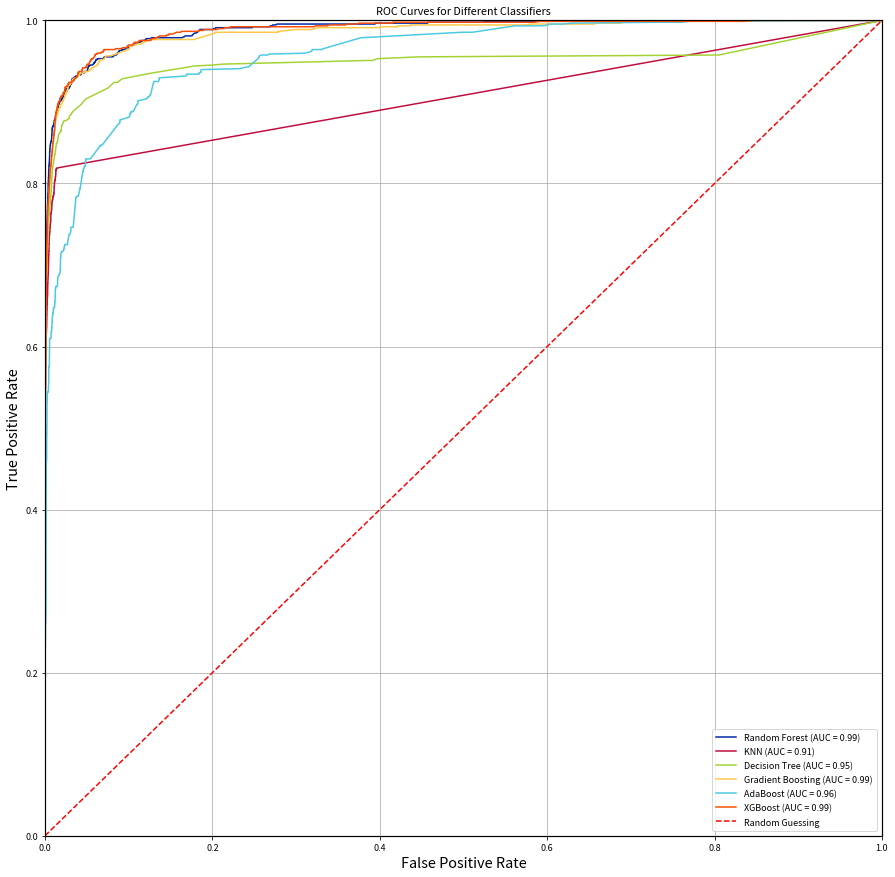

In [17]:
rf_roc_df = pd.read_csv('Models/random_forest_roc_data.csv')
knn_roc_df = pd.read_csv('Models/knn_roc_data.csv')
dt_roc_df = pd.read_csv('Models/decision_tree_roc_data.csv')
gb_roc_df = pd.read_csv('Models/gradient_boosting_roc_data.csv')
ada_roc_df = pd.read_csv('Models/adaboost_roc_data.csv')
xg_roc_df = pd.read_csv('Models/xgboost_roc_data.csv')

rf_metrics_df = pd.read_csv('Models/random_forest_metrics.csv')
knn_metrics_df = pd.read_csv('Models/knn_metrics.csv')
dt_metrics_df = pd.read_csv('Models/decision_tree_metrics.csv')
gb_metrics_df = pd.read_csv('Models/gradient_boosting_metrics.csv')
ada_metrics_df = pd.read_csv('Models/adaboost_metrics.csv')
xg_metrics_df = pd.read_csv('Models/xgboost_metrics.csv')

rf_auc_value = rf_metrics_df.loc[rf_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
knn_auc_value = knn_metrics_df.loc[knn_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
dt_auc_value = dt_metrics_df.loc[dt_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
gb_auc_value = gb_metrics_df.loc[gb_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
ada_auc_value = ada_metrics_df.loc[ada_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]
xg_auc_value = xg_metrics_df.loc[xg_metrics_df['Metric'] == 'AUC-ROC', 'Value'].values[0]

fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(rf_roc_df['False Positive Rate'], rf_roc_df['True Positive Rate'], label=f'Random Forest (AUC = {rf_auc_value:.2f})')
ax.plot(knn_roc_df['False Positive Rate'], knn_roc_df['True Positive Rate'], label=f'KNN (AUC = {knn_auc_value:.2f})')
ax.plot(dt_roc_df['False Positive Rate'], dt_roc_df['True Positive Rate'], label=f'Decision Tree (AUC = {dt_auc_value:.2f})')
ax.plot(gb_roc_df['False Positive Rate'], gb_roc_df['True Positive Rate'], label=f'Gradient Boosting (AUC = {gb_auc_value:.2f})')
ax.plot(ada_roc_df['False Positive Rate'], ada_roc_df['True Positive Rate'], label=f'AdaBoost (AUC = {ada_auc_value:.2f})')
ax.plot(xg_roc_df['False Positive Rate'], xg_roc_df['True Positive Rate'], label=f'XGBoost (AUC = {xg_auc_value:.2f})')

# Plot diagonal line for random guessing
ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')

# Add labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves for Different Classifiers')
ax.legend()
ax.grid()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig.savefig('/home/user/gzhao/Thesis/result/ROC_Curves.pdf')

# Show the plot
plt.show()

In [3]:
# Extract metrics for the 'Attacks' class (1)
metrics = {
    'Classifier': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Function to extract metrics for a given classifier's metrics DataFrame
def extract_metrics(metrics_df, classifier_name):
    precision = metrics_df.loc[metrics_df['Metric'] == f'Precision (1)', 'Value'].values[0]
    recall = metrics_df.loc[metrics_df['Metric'] == f'Recall (1)', 'Value'].values[0]
    f1_score = metrics_df.loc[metrics_df['Metric'] == f'F1-Score (1)', 'Value'].values[0]
    
    metrics['Classifier'].append(classifier_name)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1_score)

# Extract metrics for each classifier
extract_metrics(rf_metrics_df, 'Random Forest')
extract_metrics(knn_metrics_df, 'KNN')
extract_metrics(dt_metrics_df, 'Decision Tree')
extract_metrics(gb_metrics_df, 'Gradient Boosting')
extract_metrics(ada_metrics_df, 'AdaBoost')
extract_metrics(xg_metrics_df, 'XGBoost')

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Set the bar width and positions for each metric
bar_width = 0.25
positions = range(len(metrics_df))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric with offset
ax.bar(positions, metrics_df['Precision'], width=bar_width, label='Precision')
ax.bar([p + bar_width for p in positions], metrics_df['Recall'], width=bar_width, label='Recall')
ax.bar([p + bar_width * 2 for p in positions], metrics_df['F1-Score'], width=bar_width, label='F1-Score')

# Add labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Metrics for "Attacks" Class Across Different Classifiers')
ax.set_xticks([p + bar_width for p in positions])  # Set x-ticks to the center of the grouped bars
ax.set_xticklabels(metrics_df['Classifier'])
ax.legend()
ax.grid(axis='y')
ax.set_ylim(0, 1)  # Set y-axis limits

fig.savefig('/home/user/gzhao/Thesis/result/Metrics.pdf')

# Show the plot
plt.show()

NameError: name 'rf_metrics_df' is not defined